First 5 rows of data:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6  

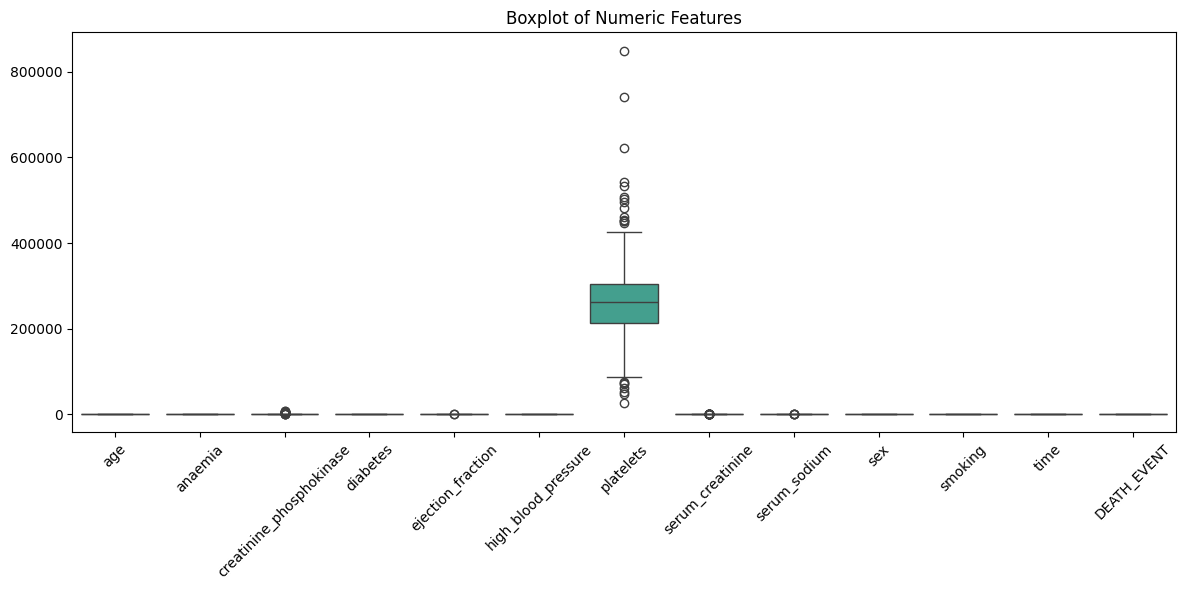


✅ Cleaned data saved to '../data/data_cleaned.csv'
✅ Scaler saved to '../model/scaler.pkl'


In [7]:
# 00_data_preprocessing.ipynb

# =======================
# 1. Import Libraries
# =======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import joblib

# =======================
# 2. Load Data
# =======================
df = pd.read_csv('../data/heart_failure_clinical_records_dataset.csv')
print("First 5 rows of data:")
print(df.head())

# =======================
# 3. Check for Nulls
# =======================
print("\nNull values per column:")
print(df.isnull().sum())

# =======================
# 4. Data Types
# =======================
print("\nData types:")
print(df.dtypes)

# =======================
# 5. Visualize Outliers
# =======================
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Features')
plt.tight_layout()
plt.show()

# =======================
# 6. Standardize Numeric Features
# =======================
# Include 'time' in the numeric features to match the prediction pipeline
num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 
            'platelets', 'serum_creatinine', 'serum_sodium', 'time']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# =======================
# 7. Save Cleaned Data
# =======================
df.to_csv('../data/data_cleaned.csv', index=False)
print("\n✅ Cleaned data saved to '../data/data_cleaned.csv'")

# =======================
# 8. Save Scaler for Inference
# =======================
joblib.dump(scaler, '../model/scaler.pkl')
print("✅ Scaler saved to '../model/scaler.pkl'")
